In [7]:
import pandas as pd
inflation_df = pd.read_csv("us-infl.csv", header=0,names=['id', 'rate'], index_col=0)

#inflation_df = pd.read_csv("us-infl.csv")


In [8]:
inflation_df.head()

,rate
id,
1,0.44
2,0.77
3,0.60
4,-0.22
5,-0.16


In [11]:
inflation_ts_simple = inflation_df['rate']

In [12]:
inflation_ts_simple.head()

id
1    0.44
2    0.77
3    0.60
4   -0.22
5   -0.16
Name: rate, dtype: float64

In [20]:
inflation_ts = pd.Series(inflation_df['rate'])
inflation_ts.head()


id
1    0.44
2    0.77
3    0.60
4   -0.22
5   -0.16
Name: rate, dtype: float64

In [21]:
def stationarity_test(timeseries):
    """""Augmented Dickey-Fuller Test
    Test for Stationarity"""
    from statsmodels.tsa.stattools import adfuller
    print("Results of Dickey-Fuller Test:")
    df_test =adfuller(timeseries, autolag = "AIC")
    df_output = pd.Series(df_test[0:4],
                       index =["Test Satistic", "p-value","#Lags Used","Number of Observations Used"])
    print(df_output)

In [22]:
stationarity_test(inflation_ts)

Results of Dickey-Fuller Test:
Test Satistic                 -8.599116e+00
p-value                        6.946317e-14
#Lags Used                     1.000000e+00
Number of Observations Used    1.780000e+02
dtype: float64


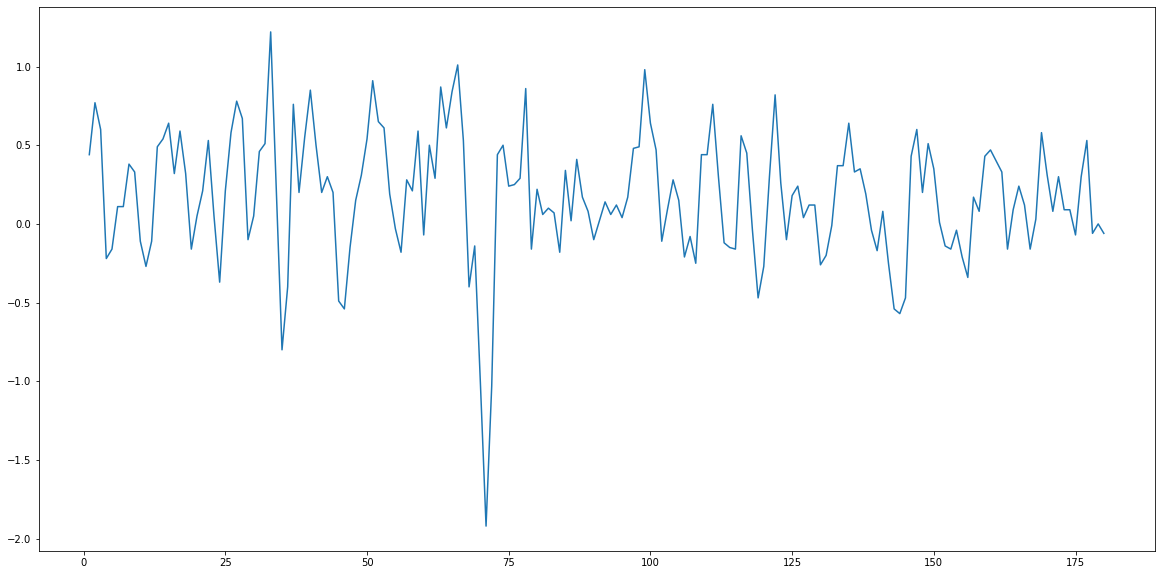

In [25]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(inflation_df)

Populating the interactive namespace from numpy and matplotlib


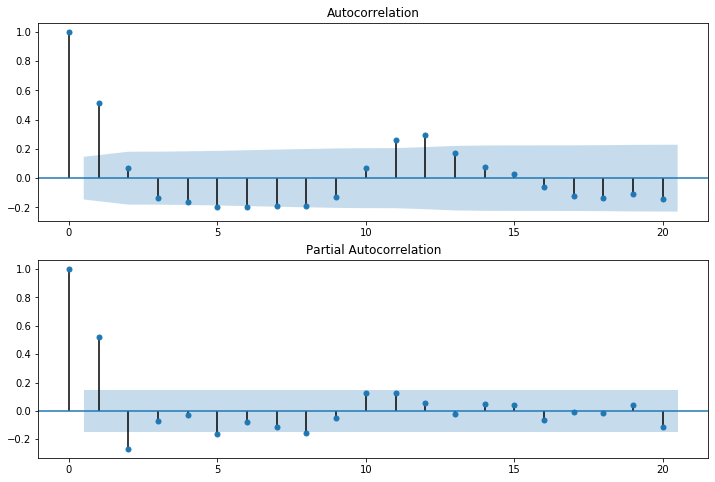

In [29]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

%pylab inline

fig = plt.figure(figsize(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(inflation_ts, lags=20,ax=ax1)
ax2= fig.add_subplot(212)
fig = plot_pacf(inflation_ts, lags=20, ax=ax2)